In [55]:
# Nama Ismai

In [56]:
# langkah pertama yaitu kita perlu mengimport library yang kita perlukan terlebih dahulu
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn .ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error


In [57]:
file_path = "https://raw.githubusercontent.com/iismaailx/Proyek_Predictive_Analytics_Dicoding/main/healthcare-dataset-stroke-data.csv"
stroke_df = pd.read_csv(file_path)
stroke_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [58]:
stroke_df.describe(include='all')

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110,5110.000000,5110.000000,5110.000000,5110,5110,5110,5110.000000,4909.000000,5110,5110.000000
unique,NaN,3,NaN,NaN,NaN,2,5,2,NaN,NaN,4,NaN
top,NaN,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,never smoked,NaN
freq,NaN,2994,NaN,NaN,NaN,3353,2925,2596,NaN,NaN,1892,NaN
mean,36517.829354,NaN,43.226614,0.097456,0.054012,NaN,NaN,NaN,106.147677,28.893237,NaN,0.048728
std,21161.721625,NaN,22.612647,0.296607,0.226063,NaN,NaN,NaN,45.283560,7.854067,NaN,0.215320
min,67.000000,NaN,0.080000,0.000000,0.000000,NaN,NaN,NaN,55.120000,10.300000,NaN,0.000000
25%,17741.250000,NaN,25.000000,0.000000,0.000000,NaN,NaN,NaN,77.245000,23.500000,NaN,0.000000
50%,36932.000000,NaN,45.000000,0.000000,0.000000,NaN,NaN,NaN,91.885000,28.100000,NaN,0.000000
75%,54682.000000,NaN,61.000000,0.000000,0.000000,NaN,NaN,NaN,114.090000,33.100000,NaN,0.000000


In [59]:
# menghapus kolom yang tidak di perlukan
stroke_df.drop(['id'], axis=1, inplace=True)
print('done')

done


In [60]:
stroke_df.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [61]:
#mengecek adanya duplikat pada data
stroke_df.duplicated().sum()

0

In [62]:
#mengecek data yang kosong atau null
stroke_df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [63]:
# menghapus data yang nul, karena kita tidak dapat mengisi data bmi sembarangan takutnya malah membuat model kita tidak valid
stroke_df.dropna(inplace=True)
stroke_df.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

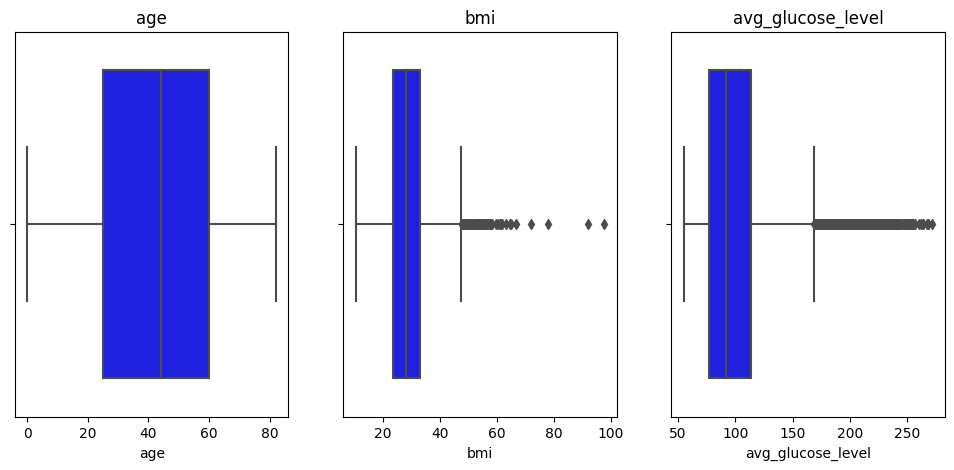

In [64]:
# Melihat Outlier pada data kita
name_col = ['age', 'bmi', 'avg_glucose_level']
plt.figure(figsize=(12, 5))
for i in range(3):
    plt.subplot(1, 3, i+1)
    sns.boxplot(x=stroke_df[name_col[i]], color='blue')
    plt.title(name_col[i])
plt.show()

In [65]:
# membuat fungsi untuk handle outlier
def handling_outliers(data, column):
    Q1 = stroke_df[column].quantile(.25)
    Q3 = stroke_df[column].quantile(.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (1.5*IQR)
    upper_bound = Q1 + (1.5*IQR)
    result = stroke_df.index[(stroke_df[column]< lower_bound) | (stroke_df[column] > upper_bound)]
    return result

In [66]:
data_columns = ['age', 'bmi', 'avg_glucose_level']
index_list = []
for column in data_columns:
    index_list.extend(handling_outliers(stroke_df, column))

# menghapus duplicated indices in the ondex_list and sort it
index_list = sorted(set(index_list))

In [67]:
# mengecek shape dataset
shape_sebelumnya = stroke_df.shape
stroke_df = stroke_df.drop(index_list)
shape_sesudahnya = stroke_df.shape
print(f'Shape data sebelumnya : {shape_sebelumnya}')
print(f'Shape data sebelumnya : {shape_sesudahnya}')

Shape data sebelumnya : (4909, 11)
Shape data sebelumnya : (3419, 11)


<Axes: xlabel='age'>

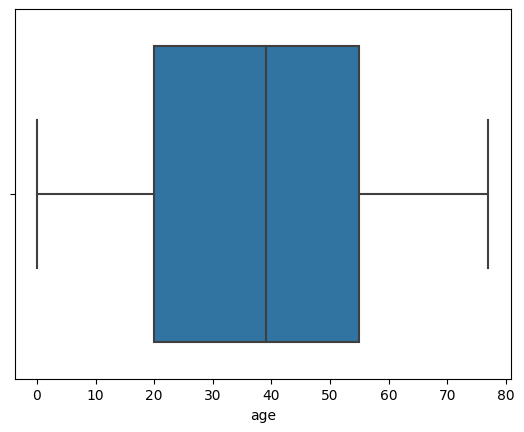

In [68]:
# cek kembali outlier pada data
sns.boxplot(x=stroke_df['age'])

# **Univariate Analysis**
Selanjutnya, kita akan melakukan proses analisis data dengan teknik Univariate EDA. Pertama, Anda bagi fitur pada dataset menjadi dua bagian, yaitu numerical features dan categorical features.

In [69]:
stroke_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3419 entries, 6 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             3419 non-null   object 
 1   age                3419 non-null   float64
 2   hypertension       3419 non-null   int64  
 3   heart_disease      3419 non-null   int64  
 4   ever_married       3419 non-null   object 
 5   work_type          3419 non-null   object 
 6   Residence_type     3419 non-null   object 
 7   avg_glucose_level  3419 non-null   float64
 8   bmi                3419 non-null   float64
 9   smoking_status     3419 non-null   object 
 10  stroke             3419 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 320.5+ KB


In [70]:
# membuat list feature dari dataset kita
numerical_features =['age', 'avg_glucose_level', 'bmi']
categorical_features=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'hypertension', 'heart_disease']

        Jumlah sampel  Persentase
Female           2007        58.7
Male             1412        41.3


<Axes: title={'center': 'gender'}>

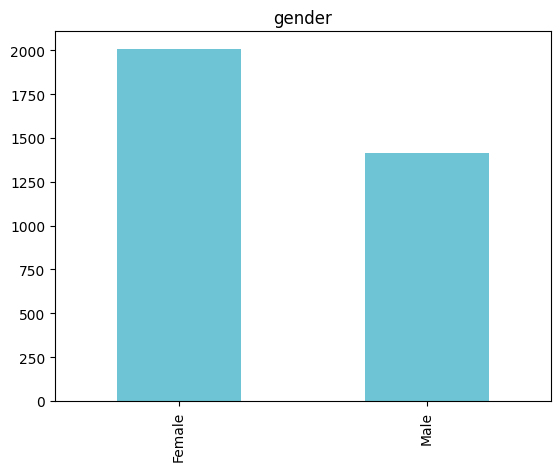

In [71]:
feature = categorical_features[0]
count = stroke_df[feature].value_counts()
percent = 100*stroke_df[feature].value_counts(normalize=True)
df = pd.DataFrame({'Jumlah sampel': count, 'Persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature, color="#6EC4D4")

     Jumlah sampel  Persentase
Yes           2010        58.8
No            1409        41.2


<Axes: title={'center': 'ever_married'}>

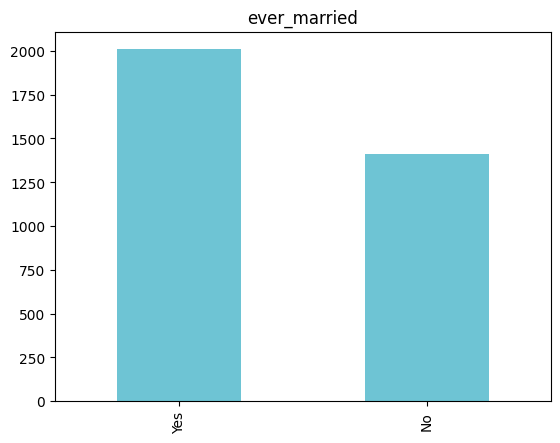

In [72]:
feature = categorical_features[1]
count = stroke_df[feature].value_counts()
percent = 100*stroke_df[feature].value_counts(normalize=True)
df = pd.DataFrame({'Jumlah sampel': count, 'Persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature, color="#6EC4D4")

               Jumlah sampel  Persentase
Private                 1920        56.2
children                 621        18.2
Govt_job                 431        12.6
Self-employed            429        12.5
Never_worked              18         0.5


<Axes: title={'center': 'work_type'}>

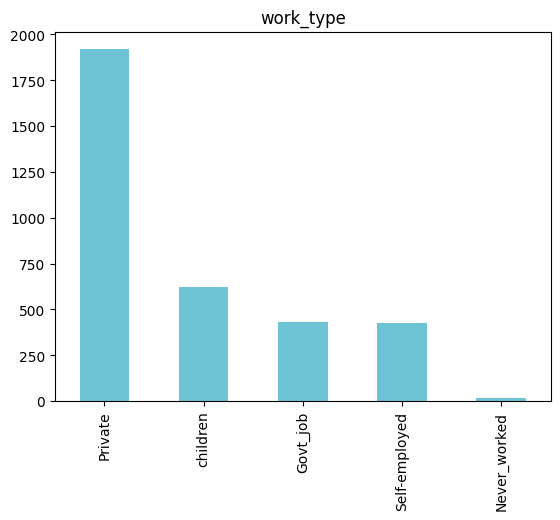

In [73]:
feature = categorical_features[2]
count = stroke_df[feature].value_counts()
percent = 100*stroke_df[feature].value_counts(normalize=True)
df = pd.DataFrame({'Jumlah sampel': count, 'Persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature, color="#6EC4D4")

       Jumlah sampel  Persentase
Urban           1711        50.0
Rural           1708        50.0


<Axes: title={'center': 'Residence_type'}>

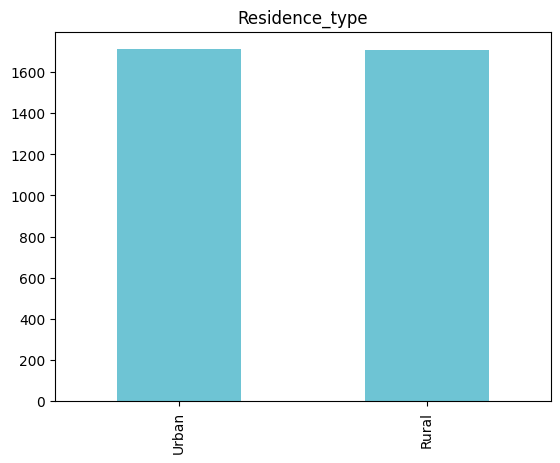

In [74]:
feature = categorical_features[3]
count = stroke_df[feature].value_counts()
percent = 100*stroke_df[feature].value_counts(normalize=True)
df = pd.DataFrame({'Jumlah sampel': count, 'Persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature, color="#6EC4D4")

                 Jumlah sampel  Persentase
never smoked              1235        36.1
Unknown                   1178        34.5
formerly smoked            506        14.8
smokes                     500        14.6


<Axes: title={'center': 'smoking_status'}>

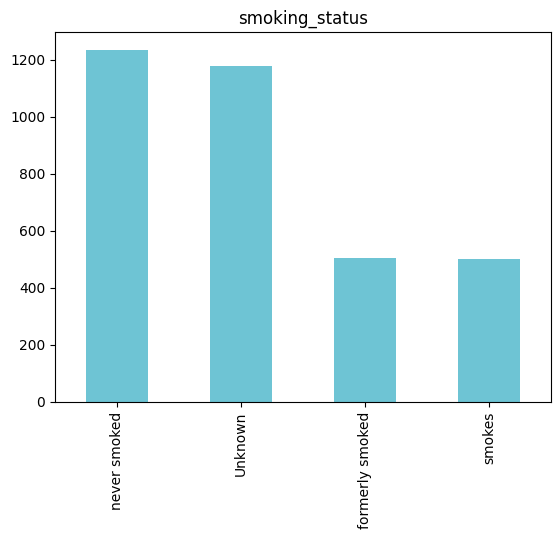

In [75]:
feature = categorical_features[4]
count = stroke_df[feature].value_counts()
percent = 100*stroke_df[feature].value_counts(normalize=True)
df = pd.DataFrame({'Jumlah sampel': count, 'Persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature, color="#6EC4D4")

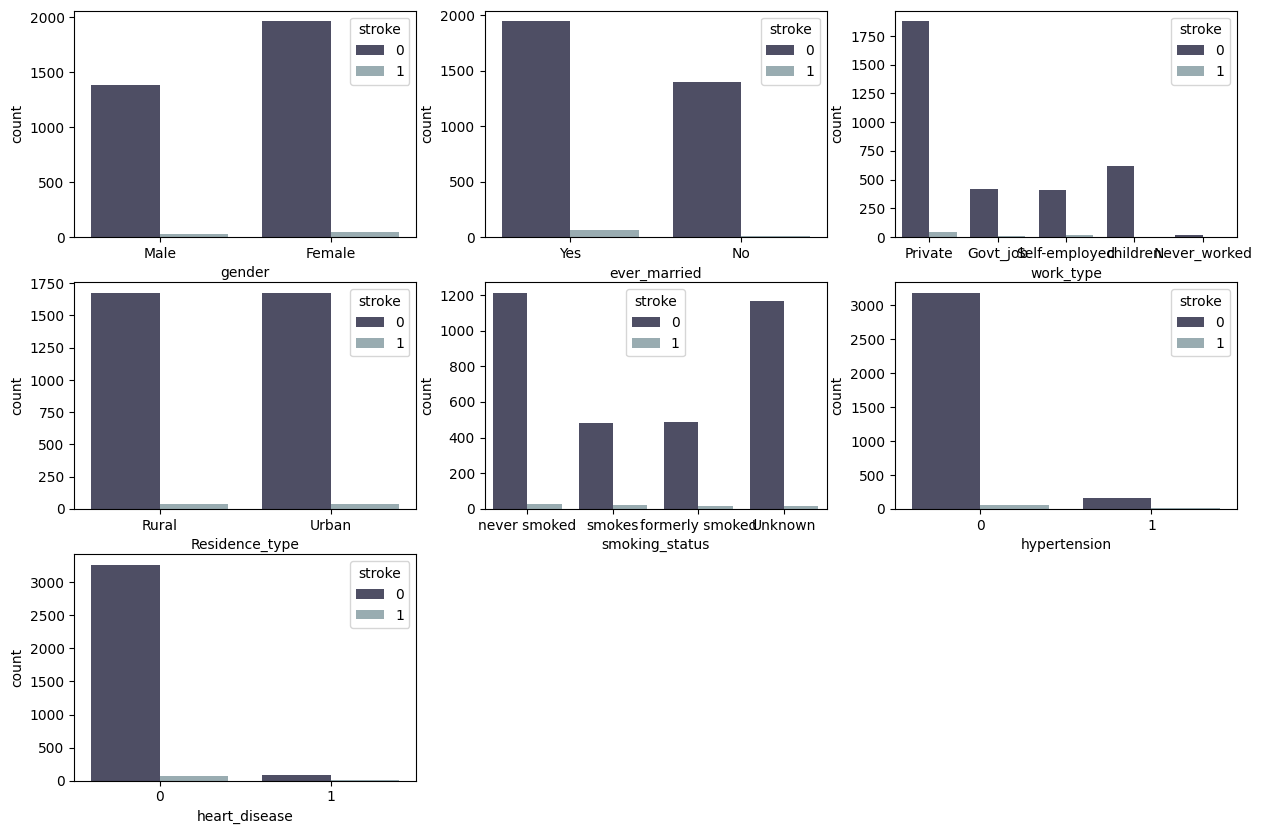

In [76]:
plt.figure(figsize=(15, 10))
for i in range(len(categorical_features)):
    plt.subplot(3, 3, i+1)
    sns.countplot(x=stroke_df[categorical_features[i]], hue = stroke_df['stroke'], palette='bone')

## **Numerical Features**
Untuk mengamati hubungan antara fitur numerik, kita akan menggunakan fungsi pairplot(). Kita juga akan mengobservasi korelasi antara fitur numerik dengan fitur target menggunakan fungsi corr().

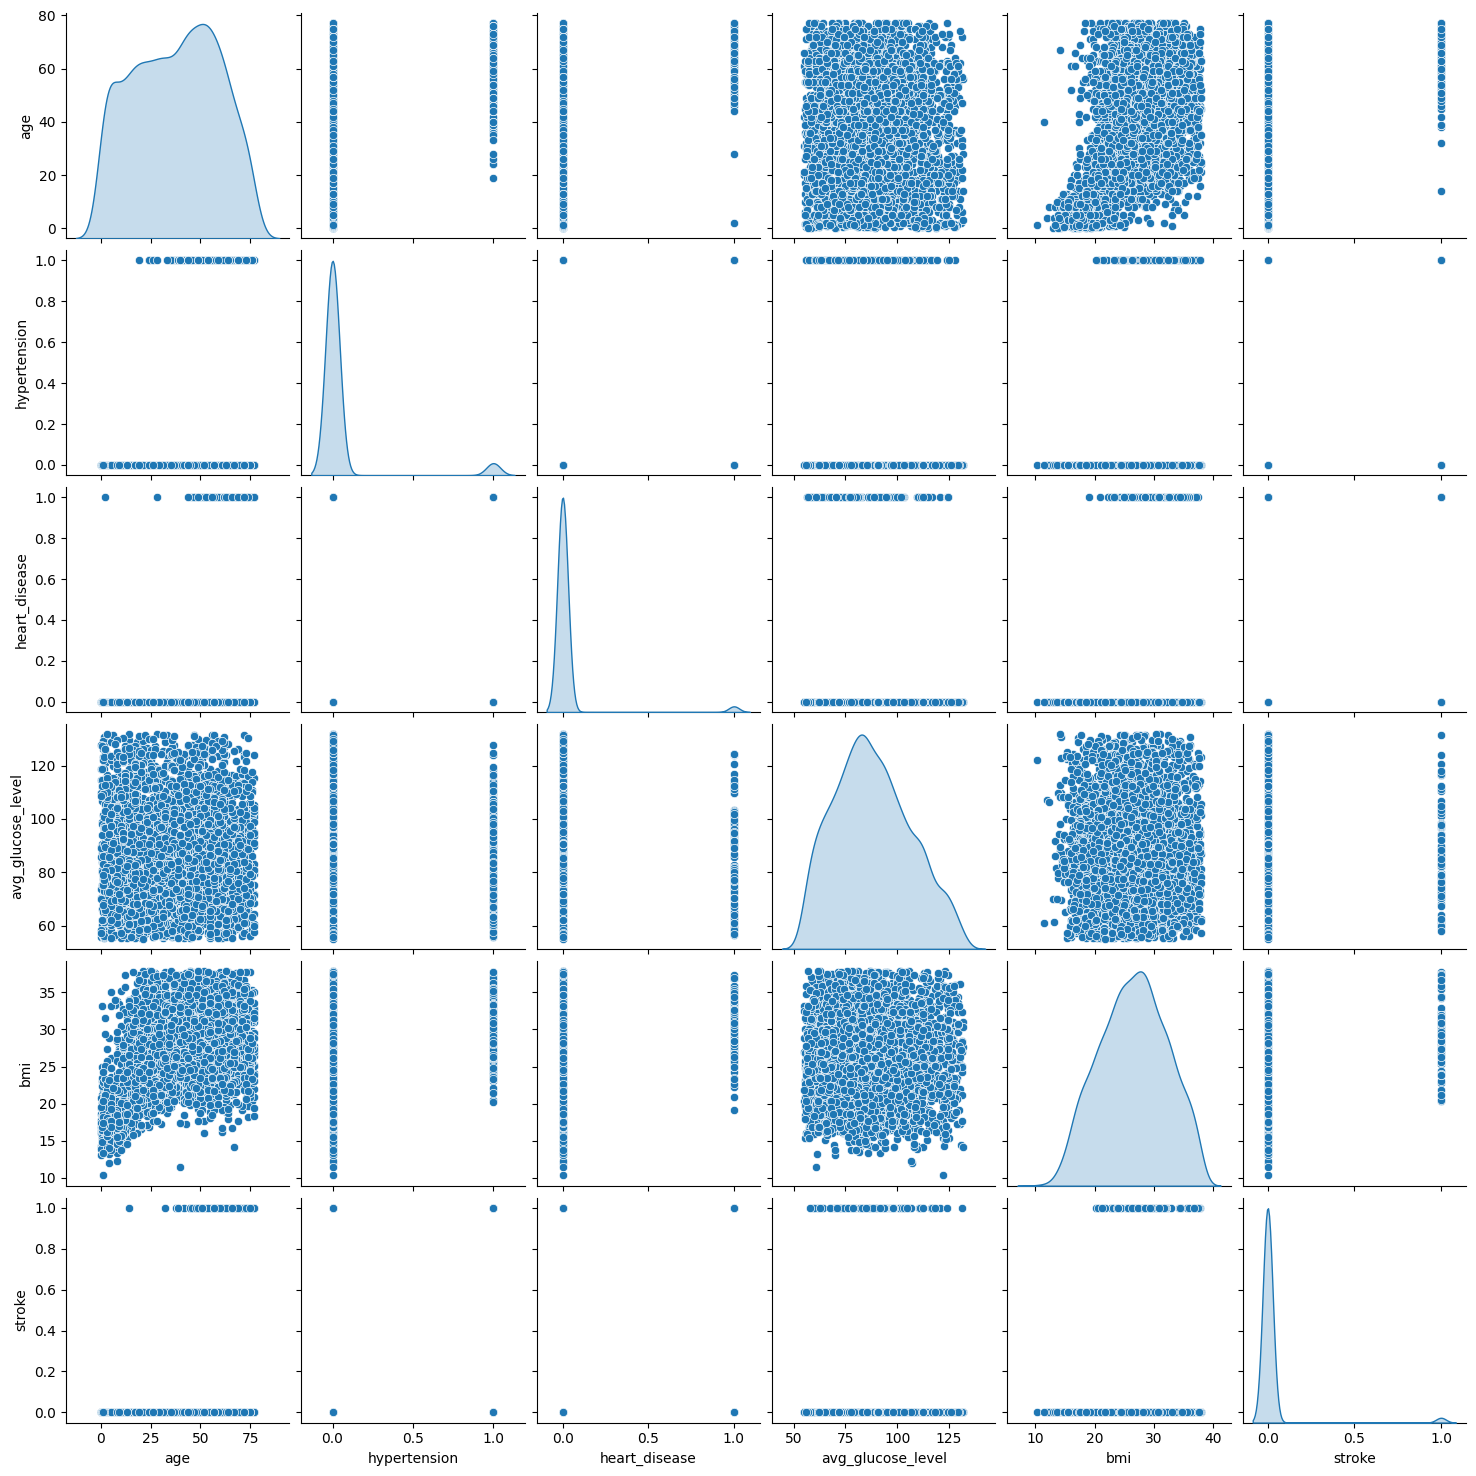

In [77]:
# melihat hubungan korelasi setiap data numerik dengan pairplot
sns.pairplot(stroke_df, diag_kind = 'kde')

<ipython-input-78-d9a304c10d4e>:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



Text(0.5, 1.0, 'Correlation Matrix untuk fitur numerik')

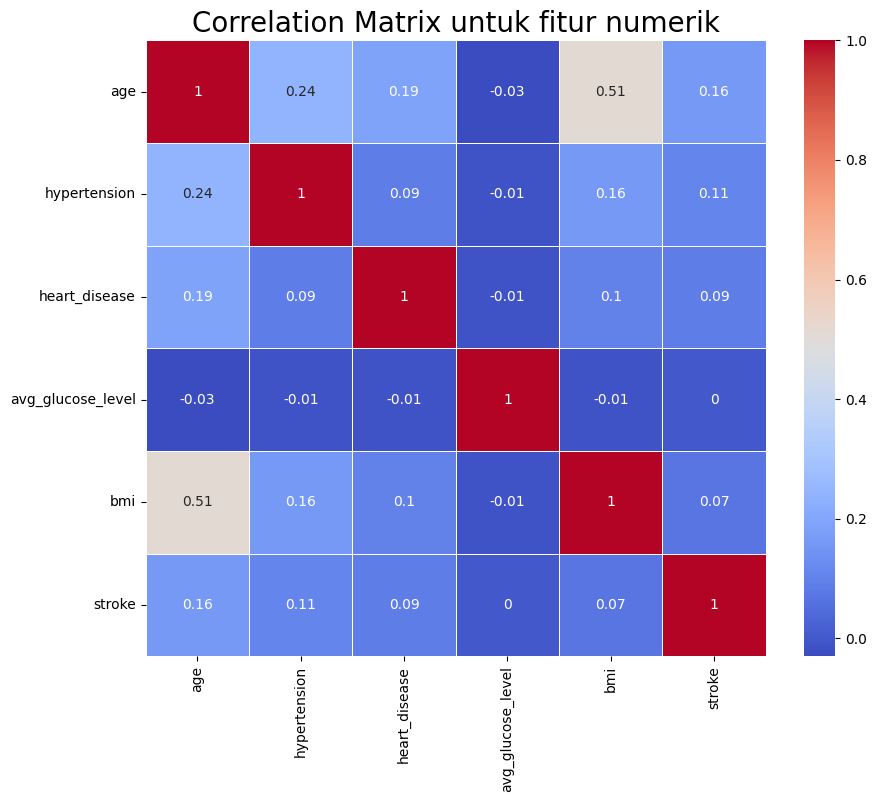

In [78]:
# mencari korelasi antar variabel angka
plt.figure(figsize=(10, 8))
correlation_matrix = stroke_df.corr().round(2)
# cetak nilai korelasi dalam heatmap
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidth=0.5)
plt.title('Correlation Matrix untuk fitur numerik', size=20)

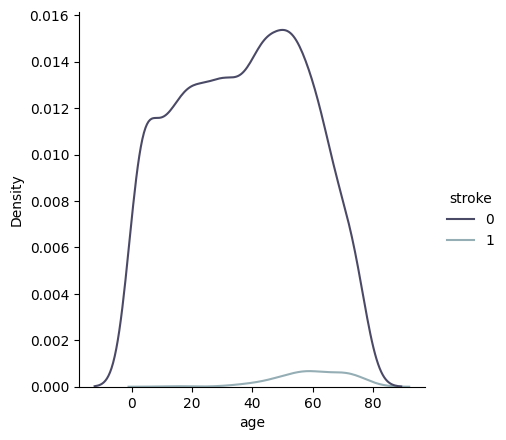

In [79]:
# melihat distribusi  data umur terhadap data stroke
sns.displot(data= stroke_df, x='age', hue ='stroke', kind='kde', palette = 'bone', height=4.5)
plt.show()

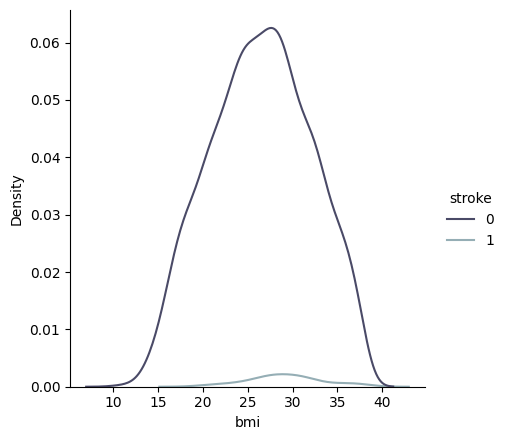

In [80]:
# melihat distribusi  data bmi terhadap data stroke
sns.displot(data=stroke_df, x='bmi', hue='stroke', kind='kde', palette='bone', height=4.5)
plt.show()

In [81]:
# melihat persebaran data stroke sendiri, apakah imbalance atau balance. karena ini mempunyai pengruh yang besar terhadap model yang akan di buat nantinya
stroke_dt = dict(stroke_df['stroke'].value_counts())
fig = px.pie(names = stroke_dt.keys(), values = stroke_dt.values(), title='Data Stroke', color_discrete_sequence=px.colors.sequential.Aggrnyl)
fig.update_traces(textposition='inside', textinfo='percent+label')

setelah kita melihat mengenai oposisi pada data, ternyata data stroke kita tidak seimbang. mari kita benarkan

In [82]:
# tahap ini disebut dengan tahap Data Preprocessing
# kita perlu resamble data yang tidak seimbang terlebih dahulu
stroke_0 = stroke_df[stroke_df.iloc[:, -1] == 0]
stroke_1 = stroke_df[stroke_df.iloc[:, -1] == 1]
stroke_df['stroke'].value_counts()

0    3344
1      75
Name: stroke, dtype: int64

In [83]:
from sklearn.utils import resample
stroke_1 = resample(stroke_1, replace=True, n_samples=stroke_0.shape[0], random_state=123)

In [84]:
stroke_df = np.concatenate((stroke_0, stroke_1))
stroke_dtf = pd.DataFrame(stroke_df)
stroke_dtf.columns =['gender', 'age', 'hypertension', 'heart_disease', 'ever_married','work_type',
                     'Residence_type', 'avg_glucose_level', 'bmi','smoking_status', 'stroke']

# kita cek apakah data sudah balance atau belum
stroke_ = dict(stroke_dtf['stroke'].value_counts())
fig = px.pie(names = ['False', 'True'], values = stroke_.values(), title='Stroke Data', color_discrete_sequence=px.colors.sequential.Aggrnyl)
fig.update_traces(textposition='inside', textinfo='percent+label')

bisa kita lihat datanya sekarang menjadi seimbang

In [85]:
# karena kita mempunyai tipe data categorical, kita perlu melalukan oneshot encoding!
stroke_dtf = pd.get_dummies(data=stroke_dtf, columns = ['gender','ever_married','work_type',
                                                        'Residence_type','smoking_status'] ,drop_first=True)

In [86]:
stroke_dtf.head(5)

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,3.0,0,0,95.12,18.0,0,1,0,0,0,0,1,0,0,0,0
1,8.0,0,0,110.89,17.6,0,0,0,0,1,0,0,1,0,0,0
2,70.0,0,0,69.04,35.9,0,0,1,0,1,0,0,0,1,0,0
3,52.0,0,0,77.59,17.7,0,0,1,0,1,0,0,1,1,0,0
4,32.0,0,0,77.67,32.3,0,0,1,0,1,0,0,0,0,0,1


In [87]:
# split data feature dan target
x = stroke_dtf.drop('stroke', axis =1)
y = pd.to_numeric(stroke_dtf['stroke'])

In [88]:
# lakukan proses data scaling
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [89]:
# split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =.20)

In [90]:
#Melihat jumlah data, data latih, dan data uji
print(f'Total # of sample in whole dataset: {len(x)}')
print(f'Total # of sample in train dataset: {len(x_train)}')
print(f'Total # of sample in test dataset: {len(x_test)}')

Total # of sample in whole dataset: 6688
Total # of sample in train dataset: 5350
Total # of sample in test dataset: 1338


In [91]:
# buat prediksi KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
acc_knn = accuracy_score(y_test, y_pred)
acc_knn

0.9745889387144993

In [92]:
# buat model prediksi Random Forest
RF =  RandomForestClassifier(n_estimators=150,criterion='entropy',random_state = 123)
RF.fit(x_train, y_train)
y_pred = RF.predict(x_test)
acc_rf = accuracy_score(y_test,y_pred)
acc_rf

0.9977578475336323

In [93]:
# buat model prediksi menggunakan SVM
SVM = SVC()
SVM.fit(x_train, y_train)
y_pred = SVM.predict(x_test)
acc_svm = accuracy_score(y_test, y_pred)
acc_svm

0.9073243647234679

In [94]:
# melihat perbandingan akurasi pada setiap model dengan terlebih dahulu meembuatnya sebagai dataFrame
best_model = {
    'KNN' : [acc_knn],
    'Random_Forest' : [acc_rf],
    'SVM': [acc_svm]
}
acc_modeldf = pd.DataFrame(best_model)
acc_modeldf

,KNN,Random_Forest,SVM
0,0.974589,0.997758,0.907324


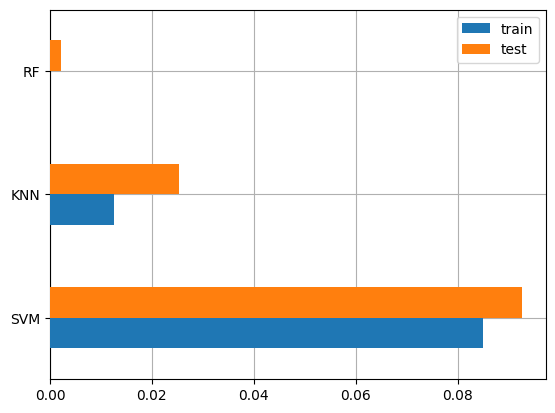

In [95]:
# Buat variabel mse yang isinya adalah dataframe nilai mse data train dan test pada masing-masing algoritma
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','SVM'])

# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {'KNN': knn, 'RF': RF, 'SVM': SVM}

# Hitung Mean Squared Error masing-masing algoritma pada data train dan test
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(x_train))
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(x_test))

fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

jika dilihat model dapat memprediksi dengan baik, namun alangkah baiknya kita menggunaskan model dengan akurasinya yang paling tinggi